<a href="https://colab.research.google.com/github/Ian-Ibrahim/SU-Machine-learning-1222785/blob/main/classification_tasks_using_decision_trees_and_a_random_forest_classifier_22may2023ml_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as numpy
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv('titanic.csv')
data.tail()

Passengerid   Age      Fare  Sex  sibsp  zero  zero.1  zero.2  zero.3  \
1304         1305  28.0    8.0500    0      0     0       0       0       0   
1305         1306  39.0  108.9000    1      0     0       0       0       0   
1306         1307  38.5    7.2500    0      0     0       0       0       0   
1307         1308  28.0    8.0500    0      0     0       0       0       0   
1308         1309  28.0   22.3583    0      1     0       0       0       0   

      zero.4  ...  zero.12  zero.13  zero.14  Pclass  zero.15  zero.16  \
1304       0  ...        0        0        0       3        0        0   
1305       0  ...        0        0        0       1        0        0   
1306       0  ...        0        0        0       3        0        0   
1307       0  ...        0        0        0       3        0        0   
1308       0  ...        0        0        0       3        0        0   

      Embarked  zero.17  zero.18  2urvived  
1304       2.0        0        0         0  
1305       0.0        0        0         0  
1306       2.0        0        0         0  
1307       2.0        0        0         0  
1308       0.0        0        0         0  

[5 rows x 28 columns]

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1307 non-null   int64  
 1   Age          1307 non-null   float64
 2   Fare         1307 non-null   float64
 3   Sex          1307 non-null   int64  
 4   sibsp        1307 non-null   int64  
 5   zero         1307 non-null   int64  
 6   zero.1       1307 non-null   int64  
 7   zero.2       1307 non-null   int64  
 8   zero.3       1307 non-null   int64  
 9   zero.4       1307 non-null   int64  
 10  zero.5       1307 non-null   int64  
 11  zero.6       1307 non-null   int64  
 12  Parch        1307 non-null   int64  
 13  zero.7       1307 non-null   int64  
 14  zero.8       1307 non-null   int64  
 15  zero.9       1307 non-null   int64  
 16  zero.10      1307 non-null   int64  
 17  zero.11      1307 non-null   int64  
 18  zero.12      1307 non-null   int64  
 19  zero.1

In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data.drop(columns=['2urvived'])
y = data['2urvived']

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, stratify=y)
print(X_tr.shape)
print(X_ts.shape)

(980, 27)
(327, 27)


Regular tree

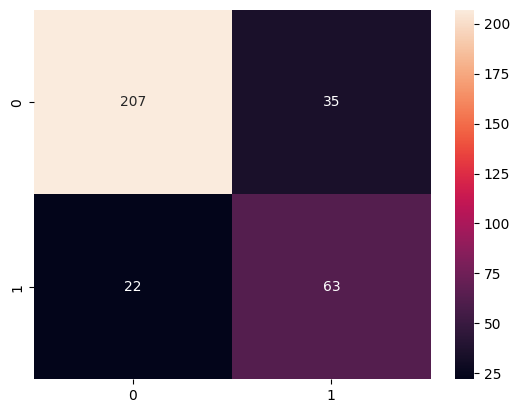

In [ ]:
clf=tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_tr,y_tr)
y_tr_pred=clf.predict(X_tr)
y_ts_pred=clf.predict(X_ts)

cm=confusion_matrix(y_ts,y_ts_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

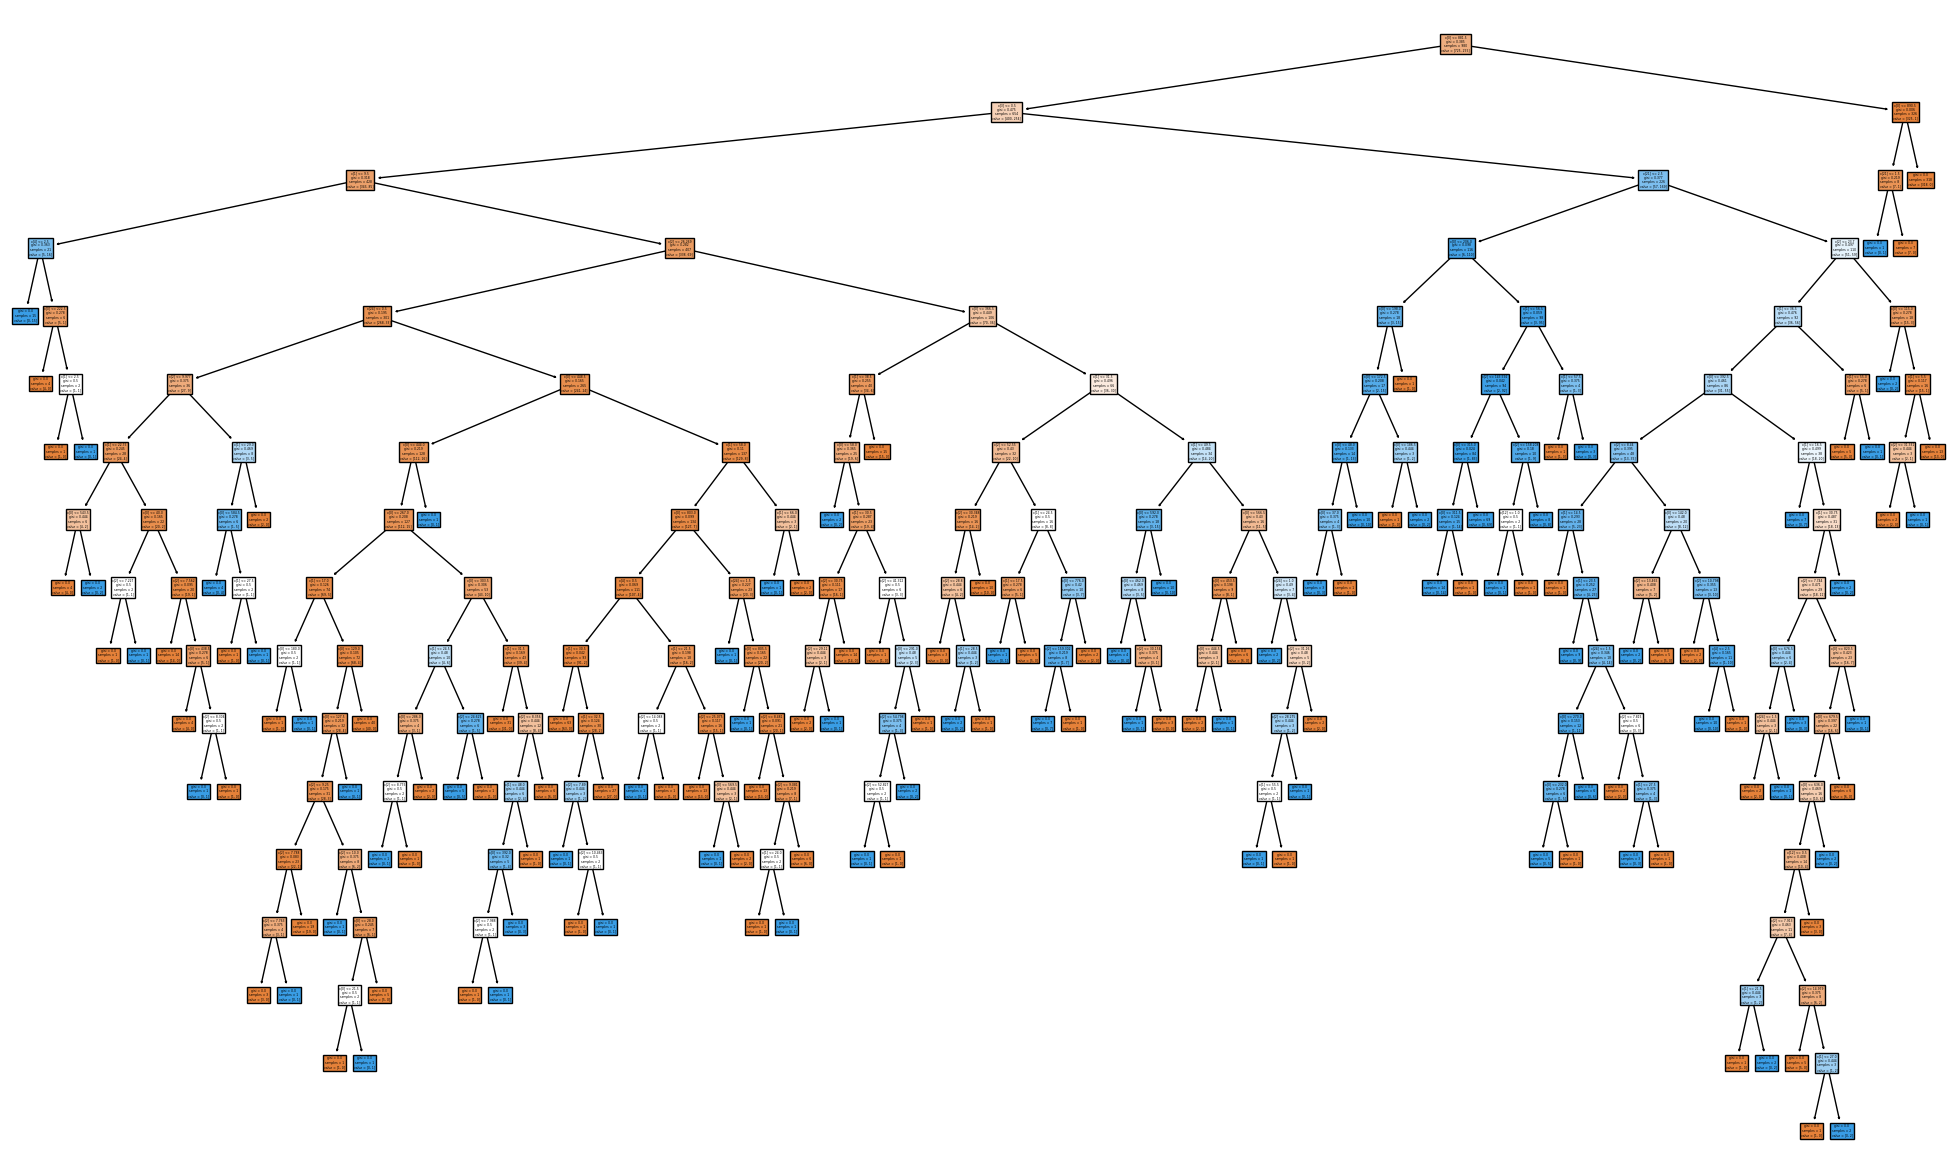

0.8256880733944955


In [ ]:
plt.figure(figsize = (25, 15))
#input functionality to visualize the tree from sklearn lib
tree.plot_tree(clf,filled=True)
plt.show()
print(accuracy_score(y_ts,y_ts_pred))

In [ ]:
plt.figure(figsize = (150, 65))
#input functionality to visualize the tree from sklearn lib
tree.plot_tree(clf,filled=True)
plt.show()
print(accuracy_score(y_ts,y_ts_pred))

0.8256880733944955


In [ ]:
print(accuracy_score(y_ts,y_ts_pred))

0.8256880733944955


Pruning

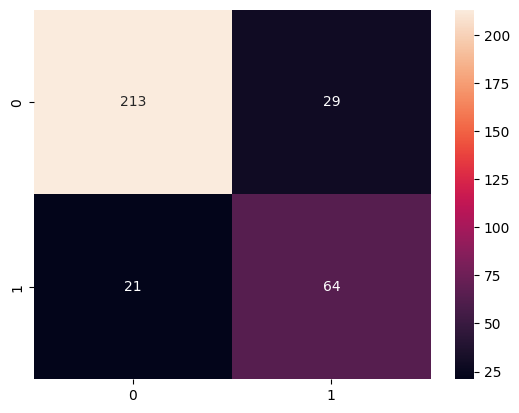

0.8470948012232415


In [ ]:
pr_clf = tree.DecisionTreeClassifier(max_depth = 3, random_state=0)
pr_clf.fit(X_tr, y_tr)
#y_tr_pred = pr_clf.predict(X_tr)
y_ts_pred = pr_clf.predict(X_ts)

pr_cm = confusion_matrix(y_ts, y_ts_pred)
sns.heatmap(pr_cm, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_ts, y_ts_pred))

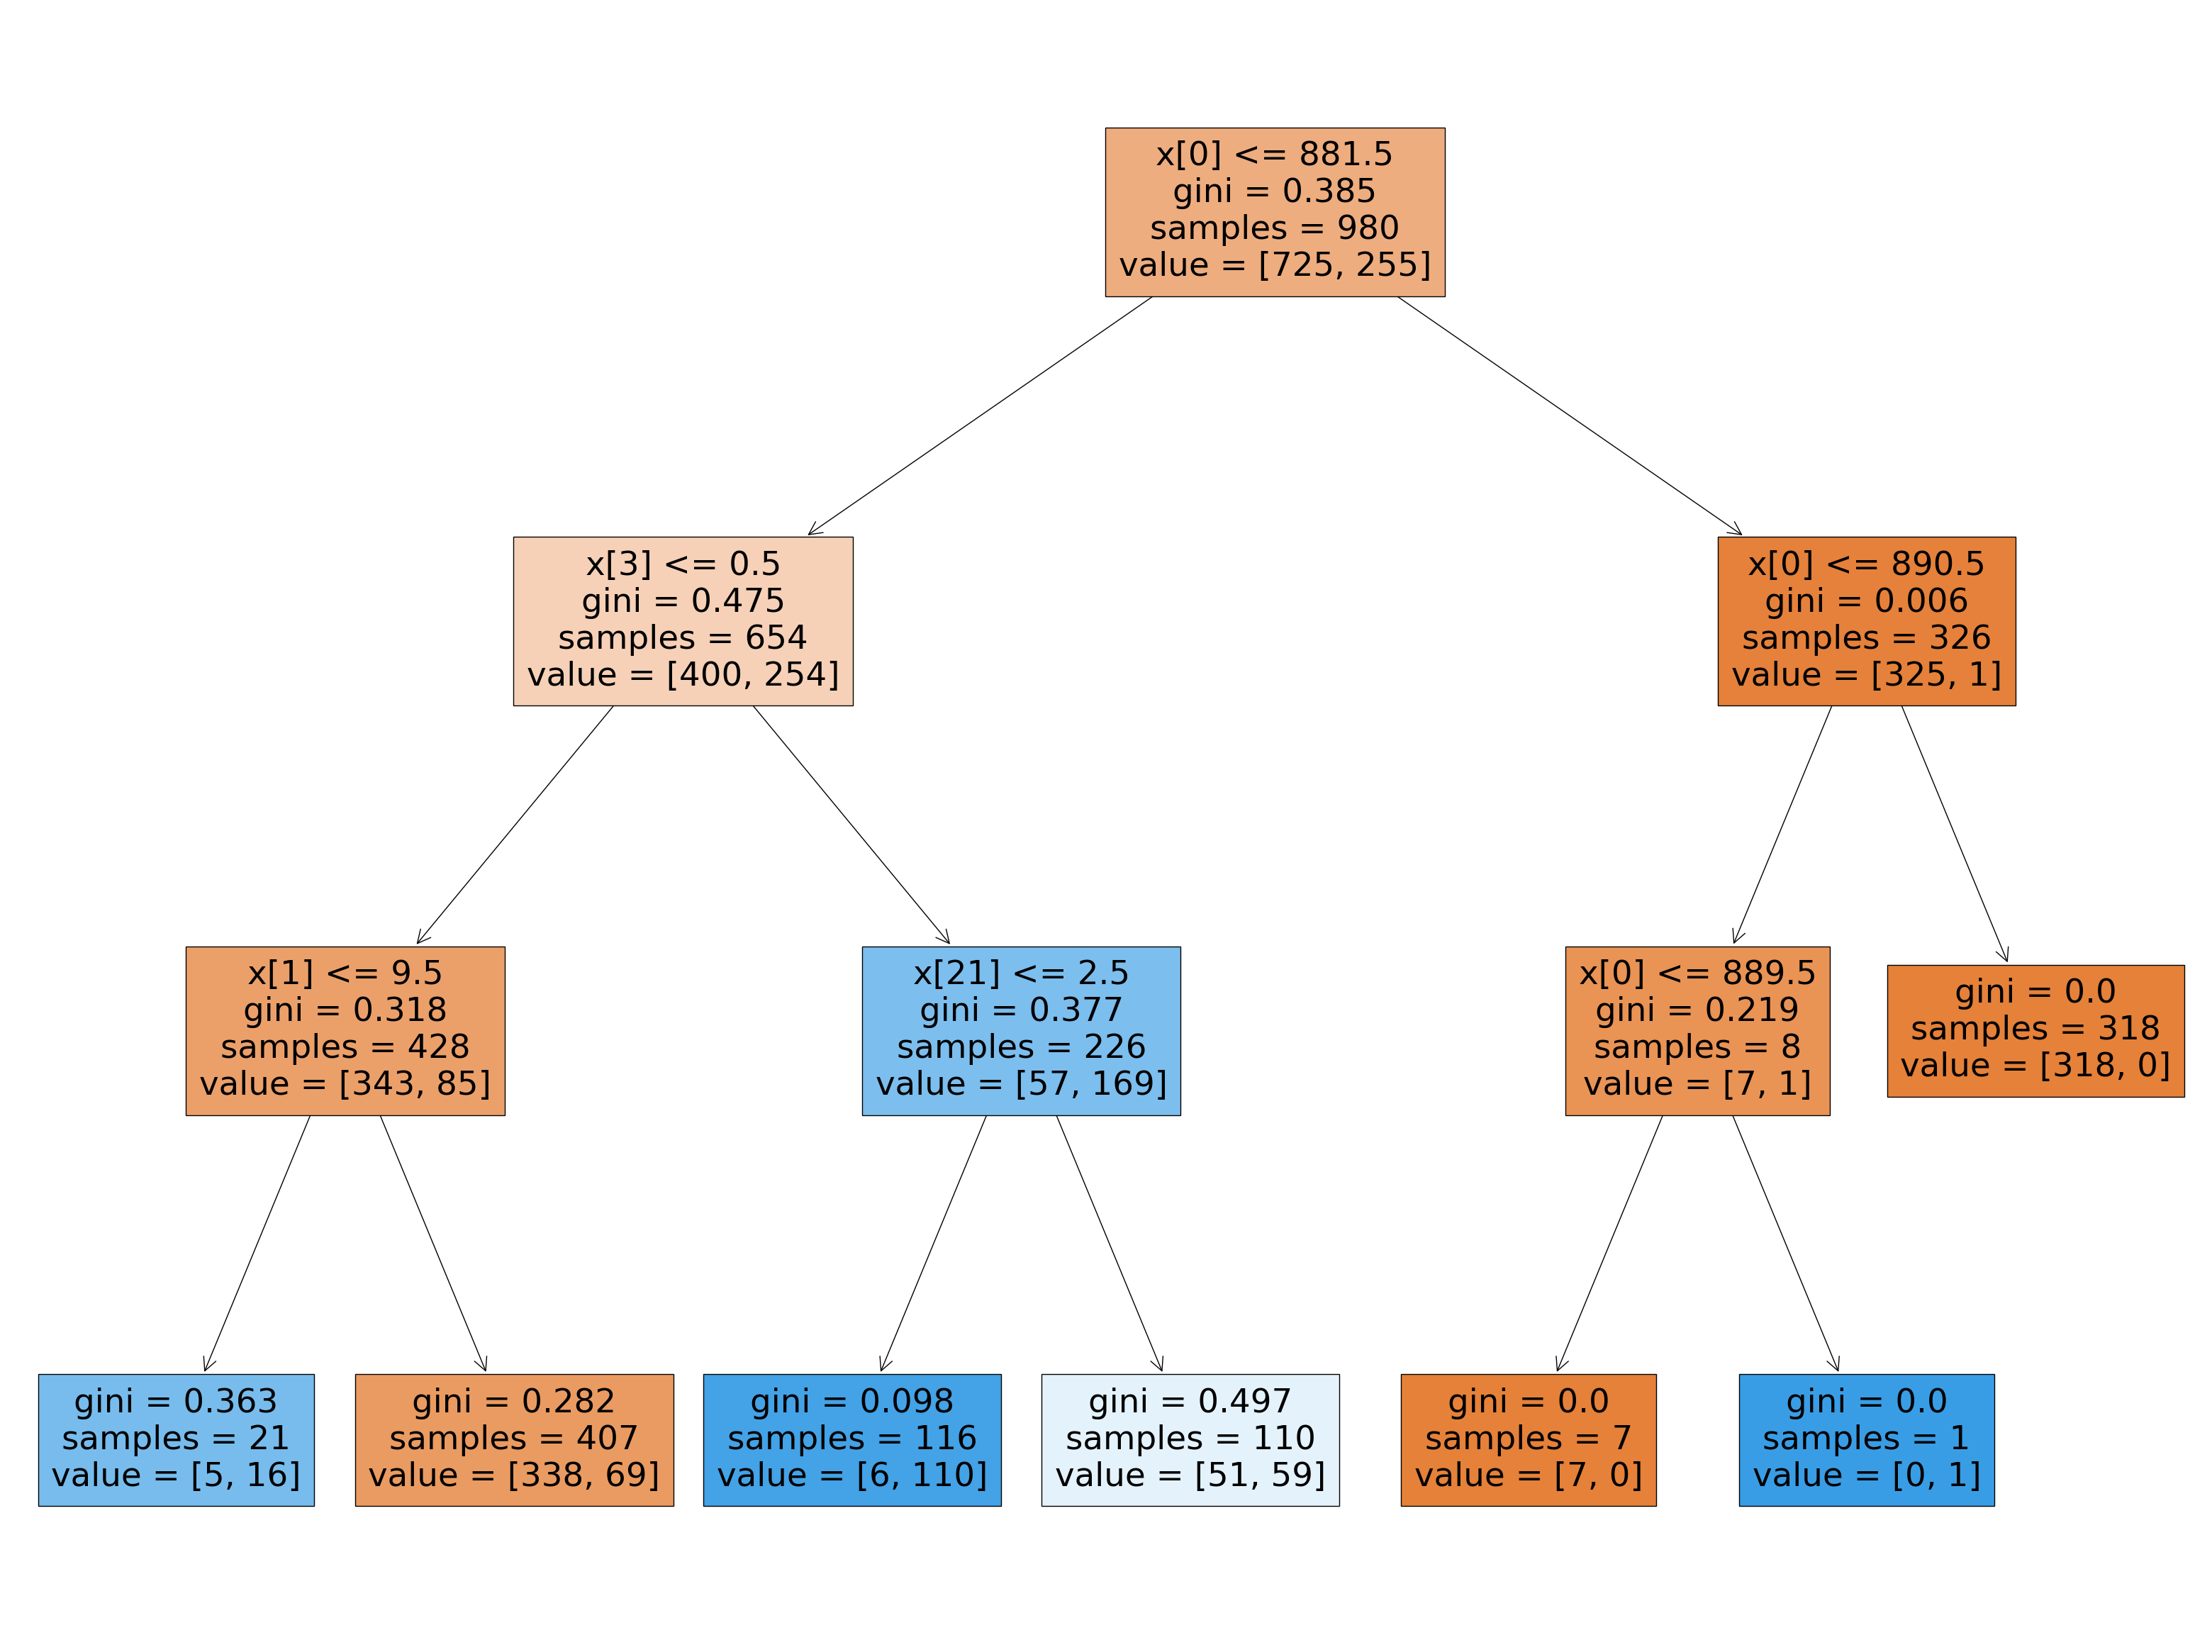

In [ ]:
plt.figure(figsize = (40, 30))
tree.plot_tree(pr_clf, filled=True)
plt.show()

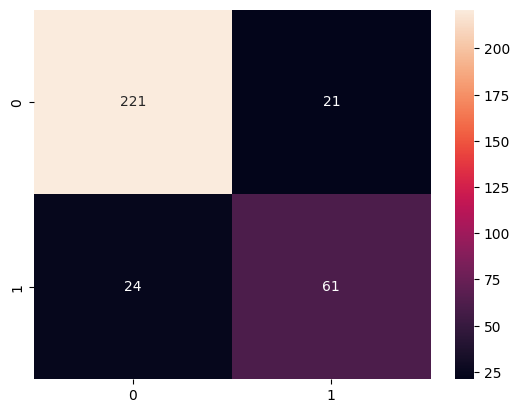

0.8623853211009175


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFR
rf_clf = RFR(random_state=0, max_depth = 2, n_estimators=2)
rf_clf.fit(X_tr, y_tr)

y_ts_pred = rf_clf.predict(X_ts)

rf_cm = confusion_matrix(y_ts, y_ts_pred)
sns.heatmap(rf_cm, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_ts, y_ts_pred))

In [ ]:
data = pd.read_csv('outlook.csv')
data.tail()

Temperature    Wind   Outlook Humidity Outcome
9         Mild    Weak      Rain   Normal     Yes
10        Mild  Strong     Sunny   Normal     Yes
11        Mild  Strong  Overcast     High     Yes
12         Hot    Weak  Overcast   Normal     Yes
13        Mild  Strong      Rain     High      No

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  14 non-null     object
 1   Wind         14 non-null     object
 2   Outlook      14 non-null     object
 3   Humidity     14 non-null     object
 4   Outcome      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
data.dropna(inplace=True)

In [ ]:
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [ ]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, stratify=y)
print(X_tr.shape)
print(X_ts.shape)

(10, 4)
(4, 4)


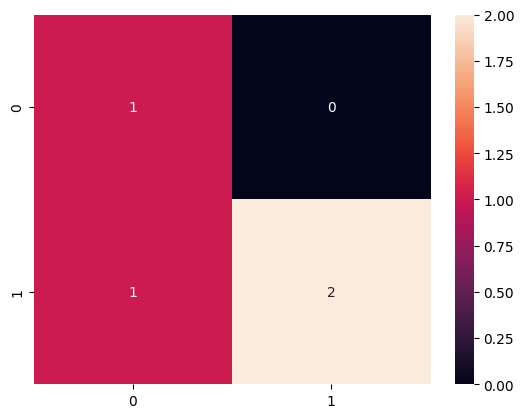

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_tr, y_tr)
y_tr_pred = clf.predict(X_tr)
y_ts_pred = clf.predict(X_ts)

cm = confusion_matrix(y_ts, y_ts_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [ ]:
print(accuracy_score(y_ts, y_ts_pred))

0.75


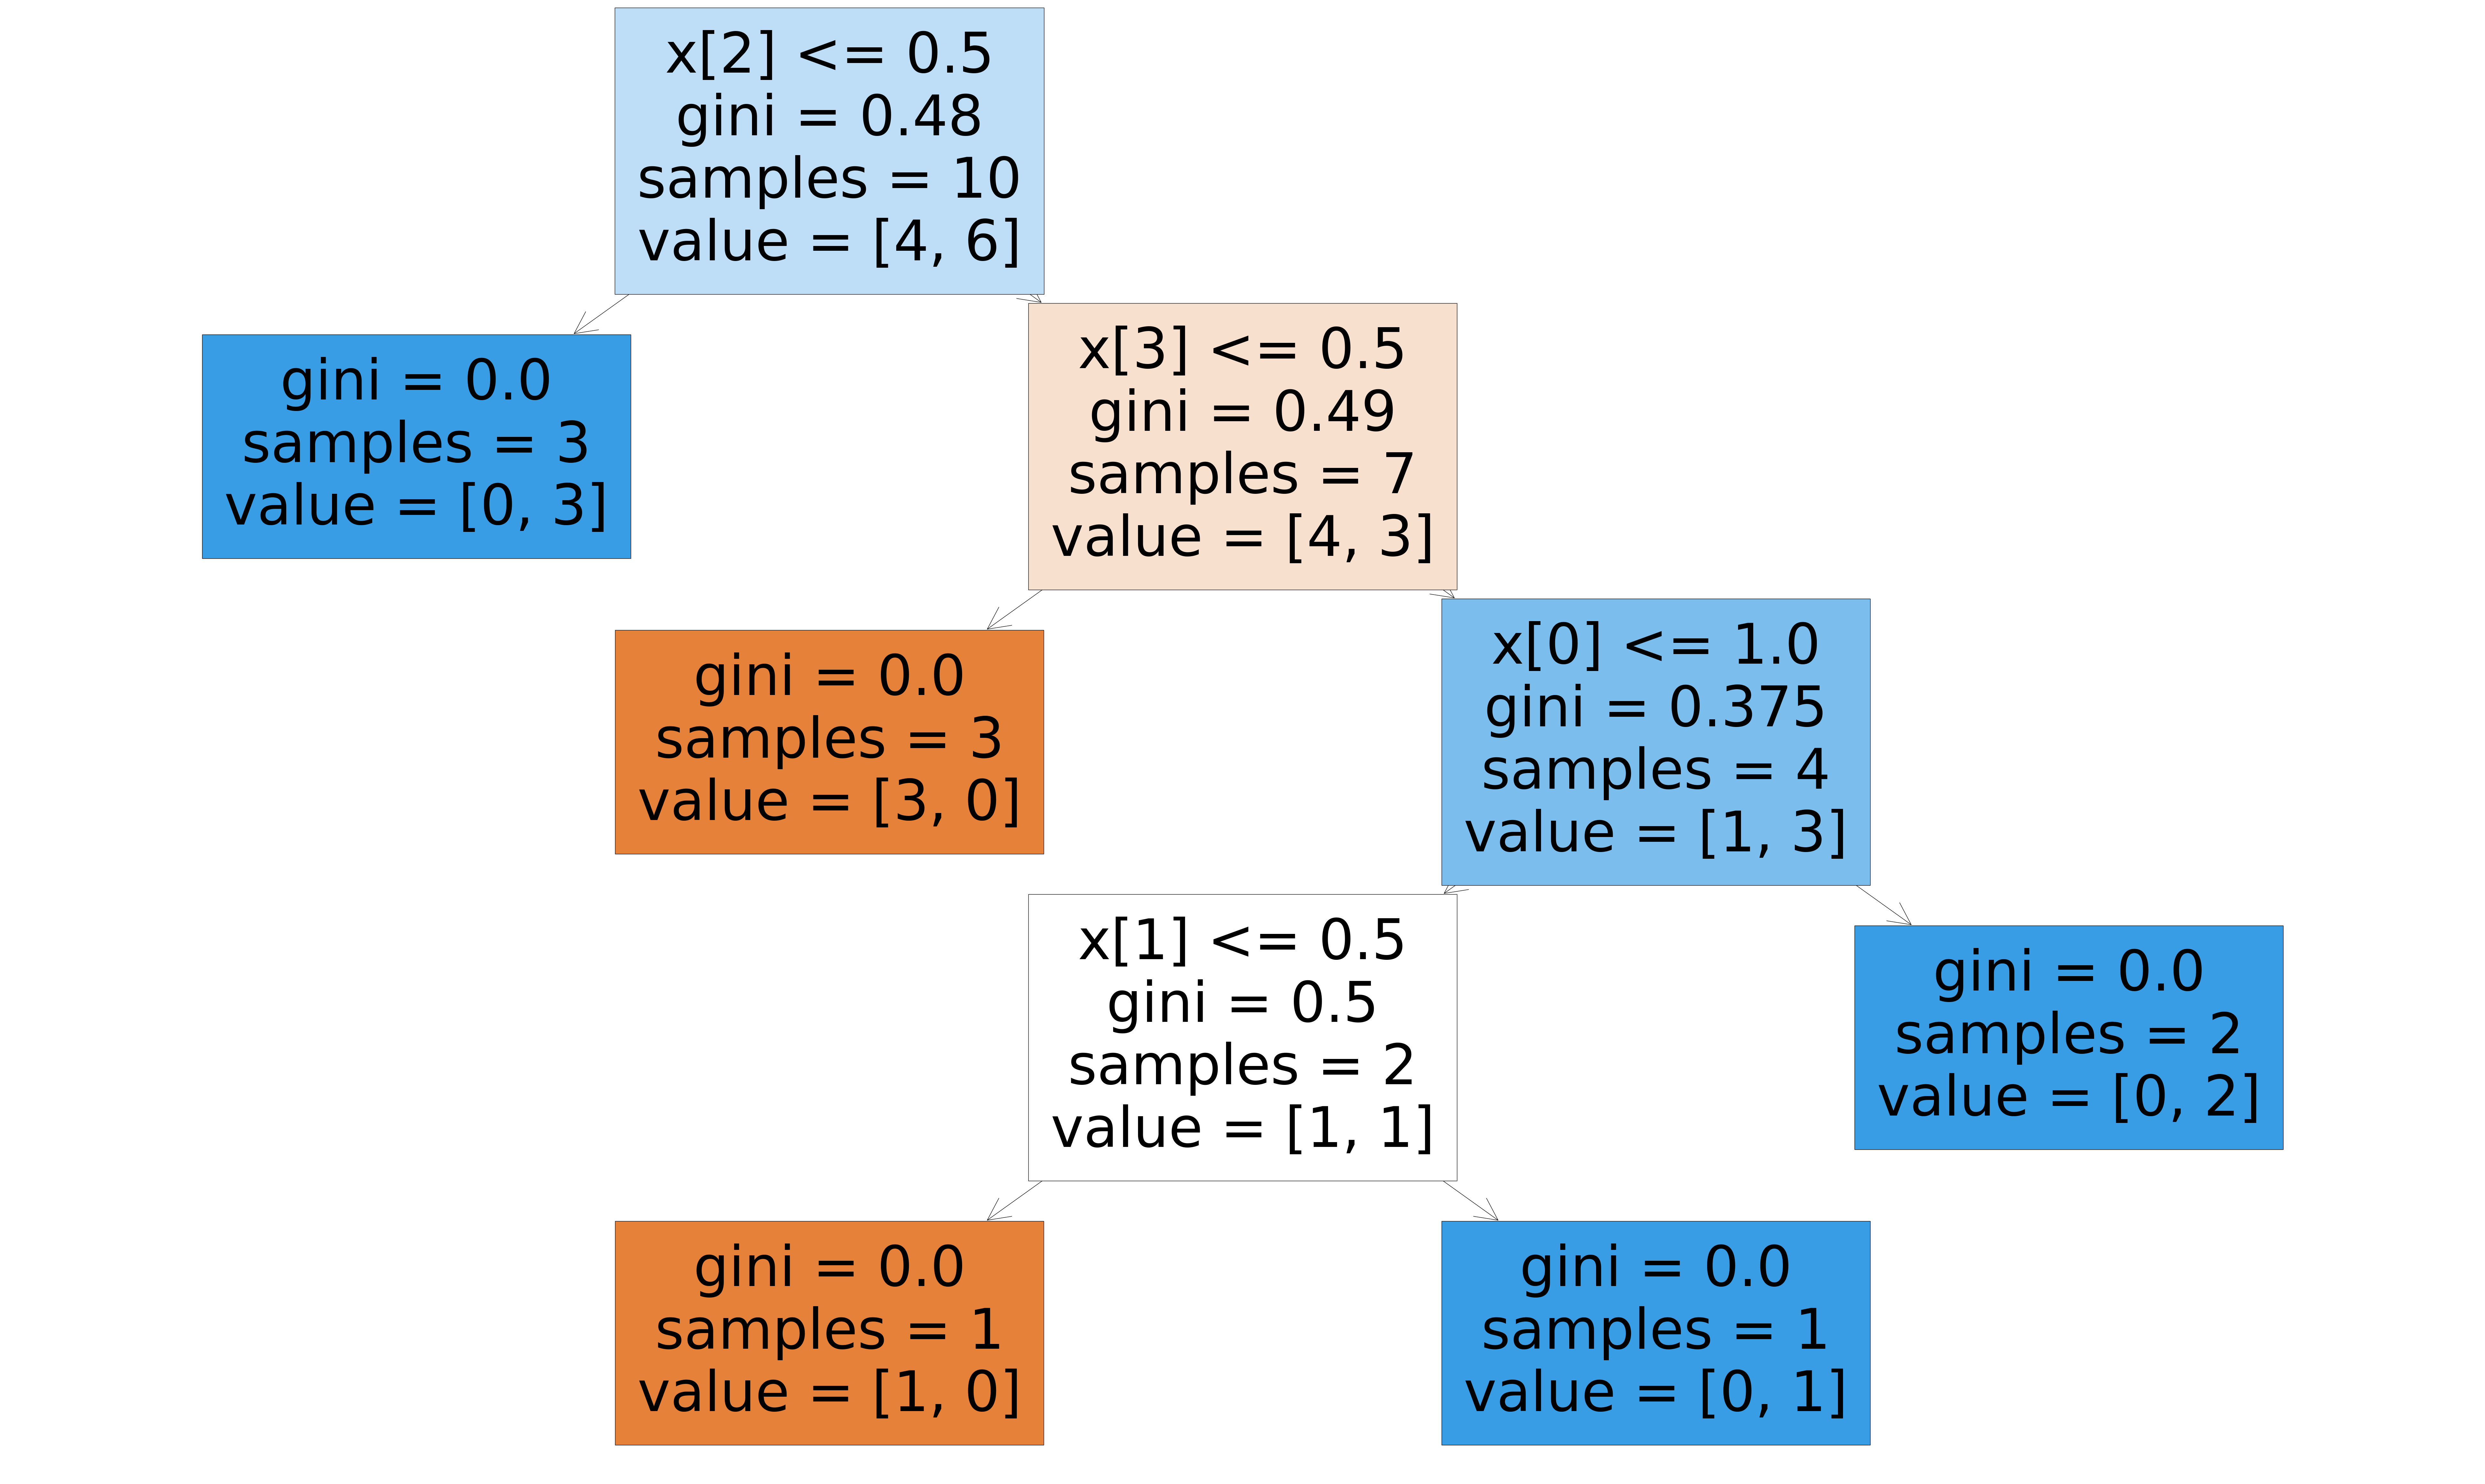

In [ ]:
plt.figure(figsize = (100, 60))
tree.plot_tree(clf, filled=True)
plt.show()

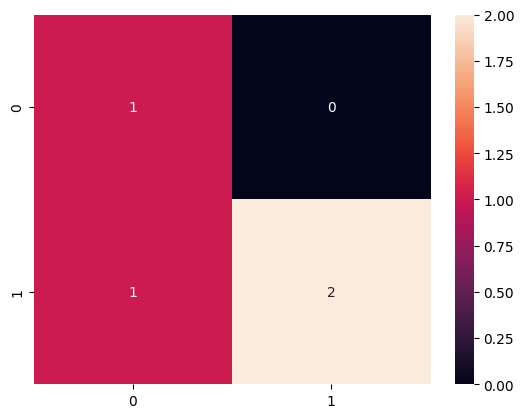

0.75


In [ ]:
#pruning
pr_clf = tree.DecisionTreeClassifier(max_depth = 2, random_state=0)
pr_clf.fit(X_tr, y_tr)
#y_tr_pred = pr_clf.predict(X_tr)
y_ts_pred = pr_clf.predict(X_ts)

pr_cm = confusion_matrix(y_ts, y_ts_pred)
sns.heatmap(pr_cm, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_ts, y_ts_pred))

0.75


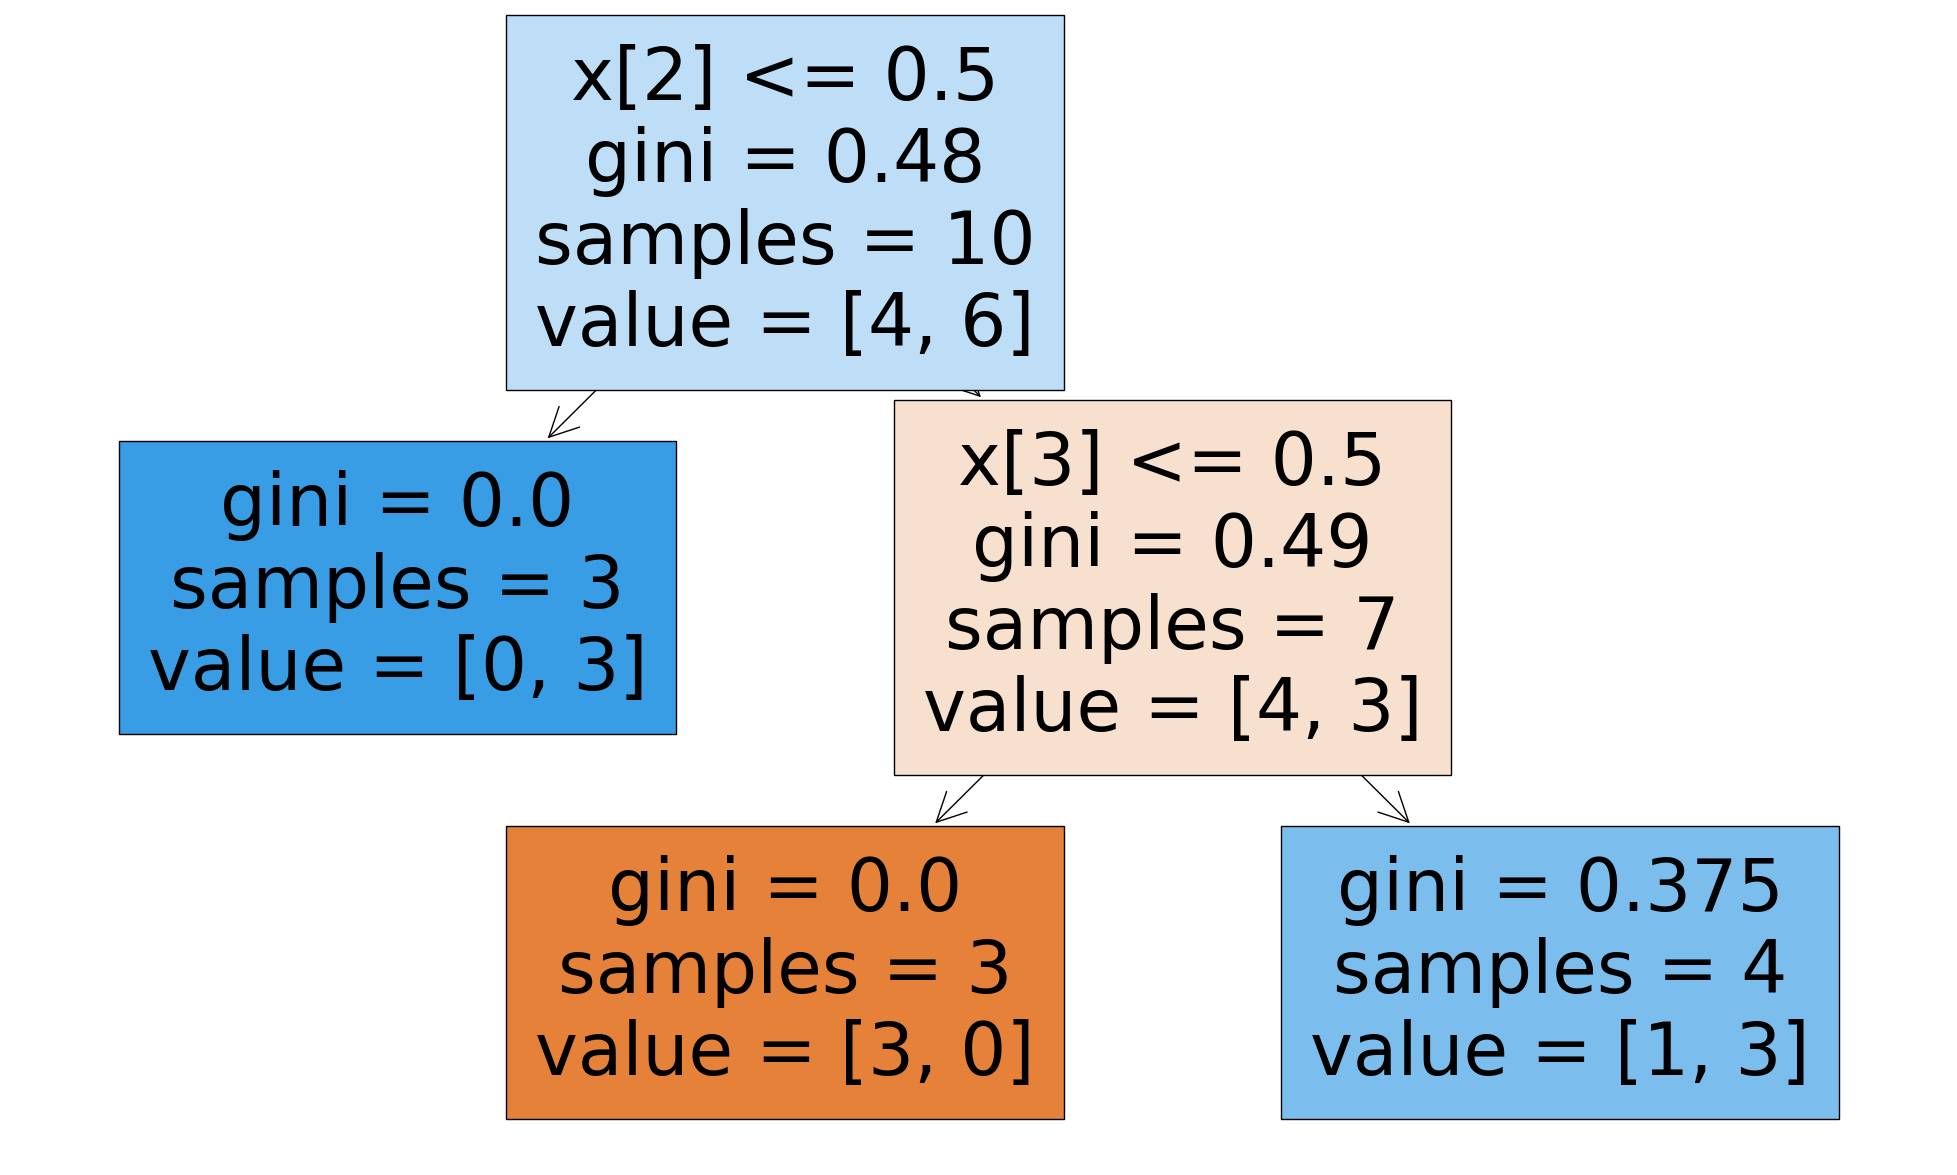

In [ ]:
print(accuracy_score(y_ts, y_ts_pred))

plt.figure(figsize = (25, 15))
tree.plot_tree(pr_clf, filled=True)
plt.show()

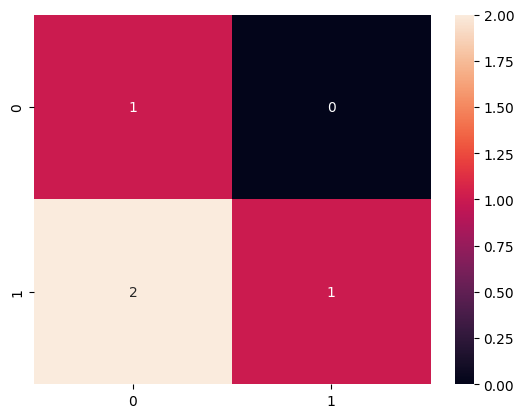

0.5


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier as RFR
rf_clf = RFR(random_state=0, max_depth = 2, n_estimators=2)
rf_clf.fit(X_tr, y_tr)

y_ts_pred = rf_clf.predict(X_ts)

rf_cm = confusion_matrix(y_ts, y_ts_pred)
sns.heatmap(rf_cm, annot=True, fmt='d')
plt.show()

print(accuracy_score(y_ts, y_ts_pred))